# PART 1: DATA GENERATOR

**Objective:** This notebook executes the necessary steps to strategically generate a set of fabricated data to be used down the project pipeline.

---

In [54]:
# Data Management
import pandas as pd

# Data Manipulation
import numpy as np
import datetime
from faker import Faker
from random import shuffle
from scipy.stats import truncnorm

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Utils
%matplotlib inline

In [55]:
fake = Faker()

## 1A: Clinic Information

Objective: Generate a dataset consisting of clinic names, locations, and distances.

---

In [39]:
# Latitude / Longitude / Shortest-Distance information was retrieved from Google Maps 

cities = ['denver', 'edgewater', 'wheatridge', 'rino', 'lakewood']
clinics_df = pd.DataFrame({
    'to_denver': [0, 5, 6.3, 1.9, 7.5],
    'to_edgewater': [5.1, 0, 2, 7.8, 4.3],
    'to_wheatridge': [6.3, 2, 0, 7.5, 12],
    'to_rino':[2, 7.7, 7.8, 0, 11],
    'to_lakewood':[8, 4.4, 4.8, 10.7, 0]},
    index=cities) 

clinics_df['lat'] = [39.73906432357836, 39.753954449845445, 39.76685732722651, 39.767327859566265, 39.70455155721396]
clinics_df['lon'] = [-104.98969659655802, -105.06778796142915, -105.08198265044479, -104.98113186098168, -105.0798829449297]

In [40]:
clinics_df

,to_denver,to_edgewater,to_wheatridge,to_rino,to_lakewood,lat,lon
denver,0.0,5.1,6.3,2.0,8.0,39.739064,-104.989697
edgewater,5.0,0.0,2.0,7.7,4.4,39.753954,-105.067788
wheatridge,6.3,2.0,0.0,7.8,4.8,39.766857,-105.081983
rino,1.9,7.8,7.5,0.0,10.7,39.767328,-104.981132
lakewood,7.5,4.3,12.0,11.0,0.0,39.704552,-105.079883


## 1B: Patient Records (past)

Objective: Generate a dataset consisting of past patient records including the location & date/time of visit.

---

#### Patient IDs

In [42]:
pids = []
for pid in range(10000, 30000):
    pids.append(pid)

#### Patient Names

In [43]:
first_names = []
last_names = []

for i in range(10000, 30000):
    first = "first_"+str(i)
    last = "last_"+str(i)
    first_names.append(first)
    last_names.append(last)

#### Date of Births

In [44]:
dobs = []

# Ages < 18 - 10% - 2000
for _ in range(2000):
    dobs.append(fake.date_of_birth(minimum_age=0, maximum_age=17))

# Ages 18-30 - 20% - 4000
for _ in range(4000):
    dobs.append(fake.date_of_birth(minimum_age=18, maximum_age=30))

# Ages 31-40 - 20% - 4000
for _ in range(4000):
    dobs.append(fake.date_of_birth(minimum_age=31, maximum_age=40))

# Ages 41-50 - 15% - 3000
for _ in range(3000):
    dobs.append(fake.date_of_birth(minimum_age=41, maximum_age=50))

# Ages 51-60 - 15% - 3000
for _ in range(3000):
    dobs.append(fake.date_of_birth(minimum_age=51, maximum_age=60))

# Ages >60 - 20% - 4000
for _ in range(4000):
    dobs.append(fake.date_of_birth(minimum_age=61, maximum_age=85))


#### Reason for Visit

In [45]:
reasons = {
    'cold/flu':3000,
    'covid':3000,
    'stomach':3000,
    'cough/chest':3000,
    'injury':1000,
    'throat':1000,
    'back_pain':3000,
    'blood':1000,
    'eyes':1000,
    'ears':1000,
}

r = []
for k, v in reasons.items():
    for i in range(v):
        r.append(k)

shuffle(r)
len(r)
# r

20000

#### Location of Visit

In [27]:
loc = {
    'denver': 6000,
    'edgewater': 3000,
    'wheatridge': 3000,
    'rino':3000,
    'lakewood': 5000}

l = []
for k, v in loc.items():
    for i in range(v):
        l.append(k)
print(len(l))

20000


#### Date of Visit

In [28]:
dates_all = []
for N in [60, 30, 30, 30, 50]:
    dates = pd.date_range(datetime.date(2022,1,1), periods=100).tolist()
    dates = [i.date().strftime('%x') for i in dates]
    dates = dates*N
    dates.sort()
    dates_all.extend(dates)
    
len(dates_all)

20000

#### Time of Visit

In [51]:
### WEEKDAY GENERATOR
def weekday(mu1, sigma1, mu2, sigma2, N):
    X1 = np.random.normal(mu1, sigma1, int(N/2))
    X2 = np.random.normal(mu2, sigma2, int(N/2))
    X = np.concatenate([X1,X2])
    return X

### WEEKEND TIMES GENERATOR
def weekend(mu, sigma, N):
    
    # Limit normal distribution to operating times (when clinic is open)
    mean, sd, low, upp = 13, 3, 8, 20
    X = truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
    X = X.rvs(N)
    
    return X

### TIME GENERATOR
def generate_times(N):
    
    for i in range(1,101):
        # Weekend
        if (i % 7 == 6) or (i % 7 == 0):    
            X_all.extend(weekend(13, 3, N))
        # Weekday
        else:                               
            X_all.extend(weekday(11, 1, 17, 1, N))
            
X_all = []
generate_times(60)  # DENVER
generate_times(30)  # EDGEWATER
generate_times(30)  # WHEATRIDGE
generate_times(30)  # RINO
generate_times(50)  # LAKEWOOD

print(len(X_all))
# X_all

20000


In [30]:
def make_time(x):
    dec = x - int(x)
    hour = int(x)
    min = int(dec*60)
    sec = int(dec*60*60 % 60)
    return datetime.time(hour, min, sec).strftime('%X')

In [31]:
# weekday mornings before 10am
# weekday lunch 12-2pm
# weekday evening 4pm-8pm

# weekends 11am-8pm, peak at 3pm

# For 20k patients, we have 100 days (~3months of data) - 1st 100 days of 2022
# 28 days are weekends (sat/sun)
# 72 days are weekdays

#### Compile patient information to create patient dataset:

In [32]:
patients = pd.DataFrame()

patients['pid'] = pids
patients.set_index('pid', inplace=True)
patients['first_name'] = first_names
patients['last_names'] = last_names
patients['birth_date'] = dobs
patients['reason'] = r
patients['location'] = l
patients['visit_date'] = dates_all
patients['checkin_time'] = X_all
patients['checkin_time'] = patients['checkin_time'].map(make_time)

patients

,first_name,last_names,birth_date,reason,location,visit_date,checkin_time
pid,,,,,,,
10000,first_10000,last_10000,2006-05-23,cold/flu,denver,01/01/22,10:23:04
10001,first_10001,last_10001,2016-06-06,covid,denver,01/01/22,08:43:52
10002,first_10002,last_10002,2014-08-10,stomach,denver,01/01/22,10:02:09
10003,first_10003,last_10003,2020-11-11,covid,denver,01/01/22,12:18:55
10004,first_10004,last_10004,2012-02-11,ears,denver,01/01/22,11:59:21
...,...,...,...,...,...,...,...
29995,first_29995,last_29995,1952-06-06,stomach,lakewood,04/10/22,15:29:14
29996,first_29996,last_29996,1950-08-20,back_pain,lakewood,04/10/22,16:41:50
29997,first_29997,last_29997,1939-11-14,cough/chest,lakewood,04/10/22,15:21:42


## 1C: Employee Records

Objective: Generate a dataset consisting employee names and IDs.

---

## TEST VISUALS (FOR DEBUG PURPOSES)

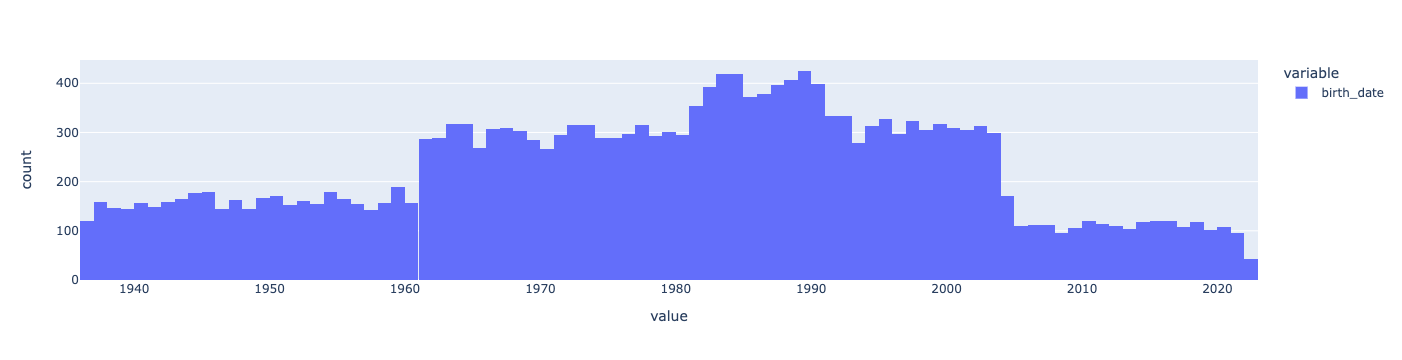

In [34]:
fig = px.histogram(patients.birth_date)
fig.show()

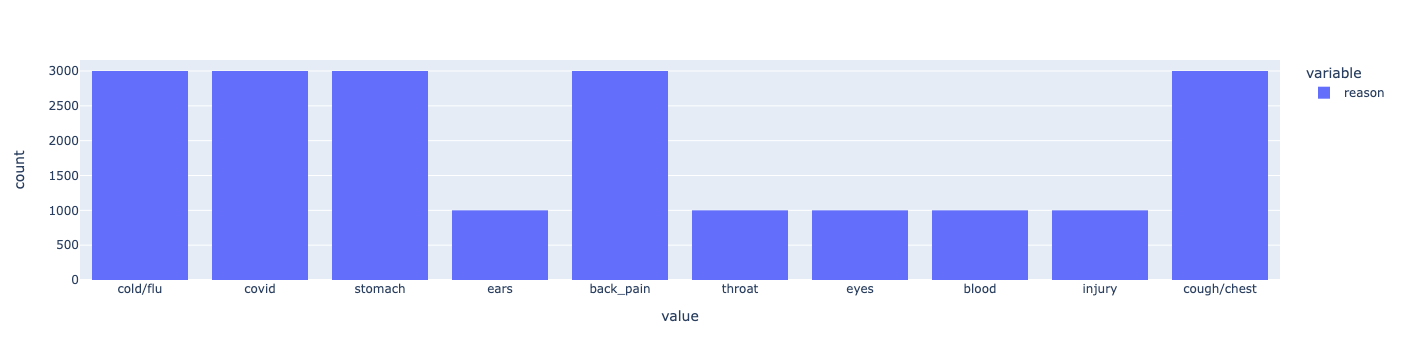

In [35]:
fig = px.histogram(patients.reason)
fig.show()

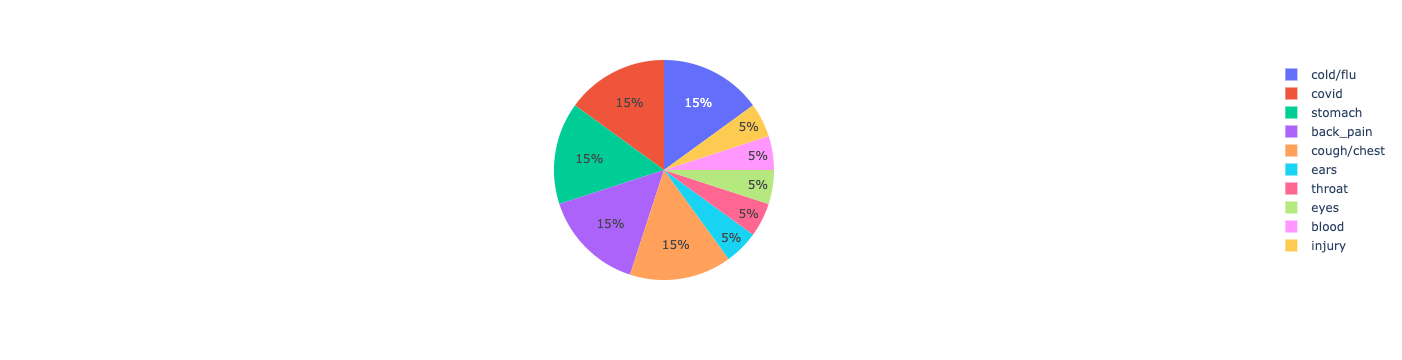

In [36]:
fig = px.pie(patients, names='reason')
fig.show()